In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

In [129]:
df = pd.read_csv('diabetes_UCI.csv')  
print(df.columns.values) 
print('df =', df)  
print('df_Info =', df.info()) 

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']
df =      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        

In [130]:
df = df.reset_index()
df.drop(['index'], axis='columns', inplace=True)

In [131]:
YRdf = pd.DataFrame(df['Outcome'])
YR = np.array(YRdf).ravel()
print('np.unique(YR) =', np.unique(YR))

np.unique(YR) = [0 1]


In [132]:
Xdf = df.copy()
Xdf.drop(['Outcome'], axis='columns', inplace=True)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000        

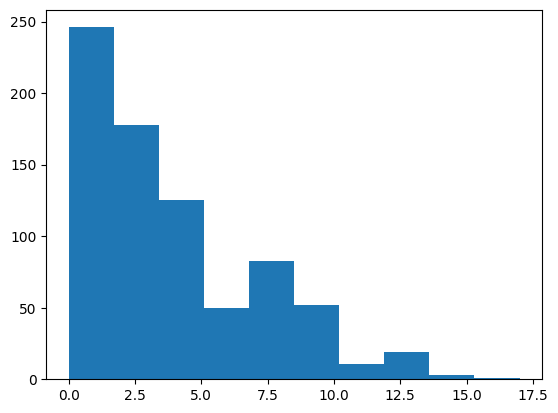

In [133]:
K = int(np.max(YR))
X = np.array(Xdf)

print(Xdf.describe())

print(plt.hist(X[:,0]))

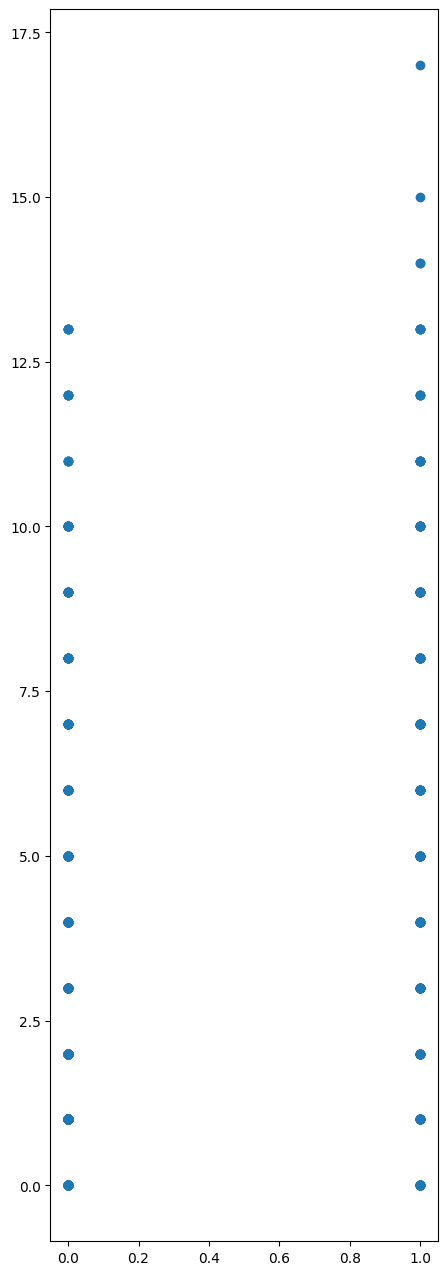

In [134]:
plt.figure(figsize = (5,16))
plt.scatter(YR, X[:, 0])
x_ticks = [0, 1]

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

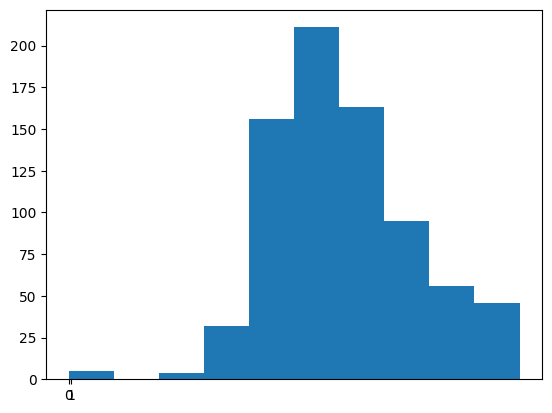

In [135]:
x_labels = ['no', 'yes']

plt.xticks(ticks = x_ticks, label = x_labels)

plt.hist(X[:, 1])

In [136]:
Glucose_no_d = X[np.where(YR==0), 1]
Glucose_d = X[np.where(YR==1), 1]

In [137]:
Glucose_no_d = np.reshape(Glucose_no_d, (-1, 1))
Glucose_d = np.reshape(Glucose_d, (-1, 1))

(array([  3.,   0.,   4.,  28., 129., 167.,  99.,  49.,  12.,   9.]),
 array([  0. ,  19.7,  39.4,  59.1,  78.8,  98.5, 118.2, 137.9, 157.6,
        177.3, 197. ]),
 <BarContainer object of 10 artists>)

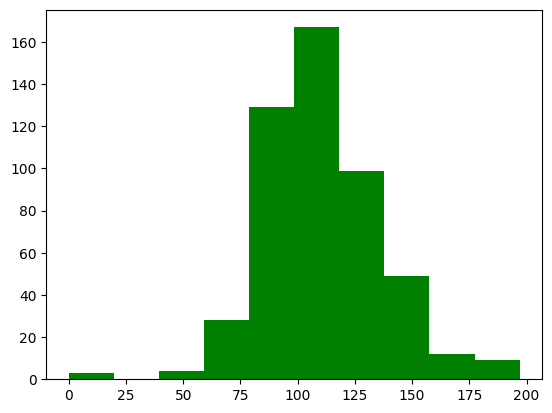

In [138]:
plt.hist(Glucose_no_d[:, 0], color='green', label='no diabete')

(array([ 2.,  0.,  0.,  1., 13., 54., 63., 51., 45., 39.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

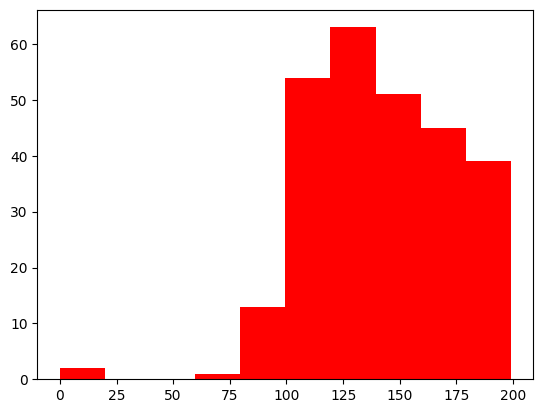

In [139]:
plt.hist(Glucose_d[:, 0], color='red', label='with diabete')

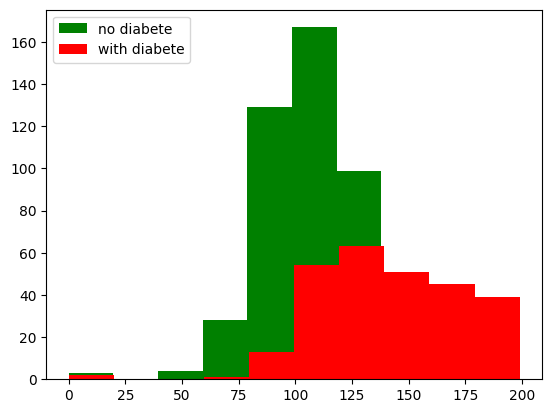

In [140]:
plt.hist(Glucose_no_d[:, 0], color='green', label='no diabete')
plt.hist(Glucose_d[:, 0], color='red', label='with diabete')
plt.legend(loc='upper left')
plt.show()

In [141]:
X.shape[0]

768

In [142]:
test_size = 268/X.shape[0]
X_train, X_test, y_train, y_test = train_test_split(X, YR, test_size = test_size)

In [143]:
print("X train shape : ", X_train.shape)
print("Y train shape : ", y_train.shape)
print("X test shape : ", X_test.shape)
print("Y test shape : ", y_test.shape)

X train shape :  (500, 8)
Y train shape :  (500,)
X test shape :  (268, 8)
Y test shape :  (268,)


In [144]:
LR = LogisticRegression(max_iter=1000).fit(X_train, y_train)
LR.score(X_train, y_train)

0.804

In [145]:
LR.score(X_test, y_test)

0.7276119402985075

<Figure size 2500x2500 with 0 Axes>

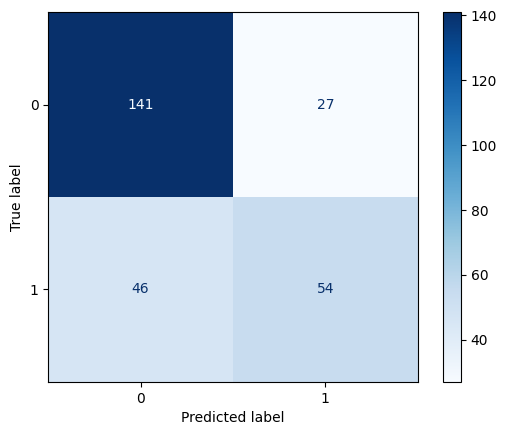

In [146]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
    LR,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

plt.show()

In [147]:
LR.predict_proba(np.reshape(X_test[1,:], (1, -1)))

array([[0.89261152, 0.10738848]])

In [148]:
y_test[1]

0

In [149]:
LR.classes_

array([0, 1], dtype=int64)

In [150]:
LR.predict(np.reshape(X_test[1,:], (1, -1)))

array([0], dtype=int64)

In [151]:
LR.predict(np.reshape(X_test[4,:], (1, -1)))

array([1], dtype=int64)

In [152]:
y_test[4]

1

In [153]:
scores = cross_val_score(LR, X, YR, cv=20)
LR = LogisticRegression(max_iter=1000)
cv = np.arange(5, 30, 1)
for i in cv :
    scores = cross_val_score(LR, X, YR, cv=i)
    print(f"mean with cv={i} : {np.mean(scores)}")

mean with cv=5 : 0.7721925133689839
mean with cv=6 : 0.7760416666666666
mean with cv=7 : 0.7761229596091982
mean with cv=8 : 0.7721354166666667
mean with cv=9 : 0.7682626538987687
mean with cv=10 : 0.7734791524265209
mean with cv=11 : 0.7734989648033125
mean with cv=12 : 0.7747395833333334
mean with cv=13 : 0.7722729248152977
mean with cv=14 : 0.776046176046176
mean with cv=15 : 0.7760432378079437
mean with cv=16 : 0.76953125
mean with cv=17 : 0.774765558397272
mean with cv=18 : 0.7723022025347608
mean with cv=19 : 0.7762516046213094
mean with cv=20 : 0.77361673414305
mean with cv=21 : 0.774917774917775
mean with cv=22 : 0.7722307104660046
mean with cv=23 : 0.7722235139114934
mean with cv=24 : 0.7747395833333334
mean with cv=25 : 0.7723870967741935
mean with cv=26 : 0.7723695844385499
mean with cv=27 : 0.7737182995803685
mean with cv=28 : 0.773762282690854
mean with cv=29 : 0.7737007564593772


In [154]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)
LR.coef_.ravel()

array([ 1.48346202e-01,  4.00290992e-02, -9.60820061e-03, -6.76520770e-03,
       -3.26544996e-04,  8.93017106e-02,  4.77326559e-01,  5.37441864e-03])

In [155]:
alphas = np.arange(10e-6, 10e-3, 10e-6)
res = np.zeros((alphas.shape[0], 8))
acc = np.zeros((alphas.shape[0]))
acc.shape

(999,)

In [156]:
lambda_ = 0.01
LR_Lasso = LogisticRegression(penalty='l1', solver='saga', C=lambda_, max_iter=1000)
alphas = np.arange(10e-6, 10e-3, 10e-6)
res = np.zeros((alphas.shape[0], 8))
acc = np.zeros((alphas.shape[0]))
for i, alpha in enumerate(alphas):
    LR_Lasso = LogisticRegression(penalty='l1', solver='saga', C=alpha, max_iter=10000).fit(X_train, y_train)
    acc[i] = LR_Lasso.score(X_train, y_train)
    for j,coeff in enumerate(LR_Lasso.coef_.ravel()):
        res[i,j] = coeff

C:\Users\MICROMEDIA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MICROMEDIA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MICROMEDIA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MICROMEDIA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Figure size 2280x1080 with 0 Axes>

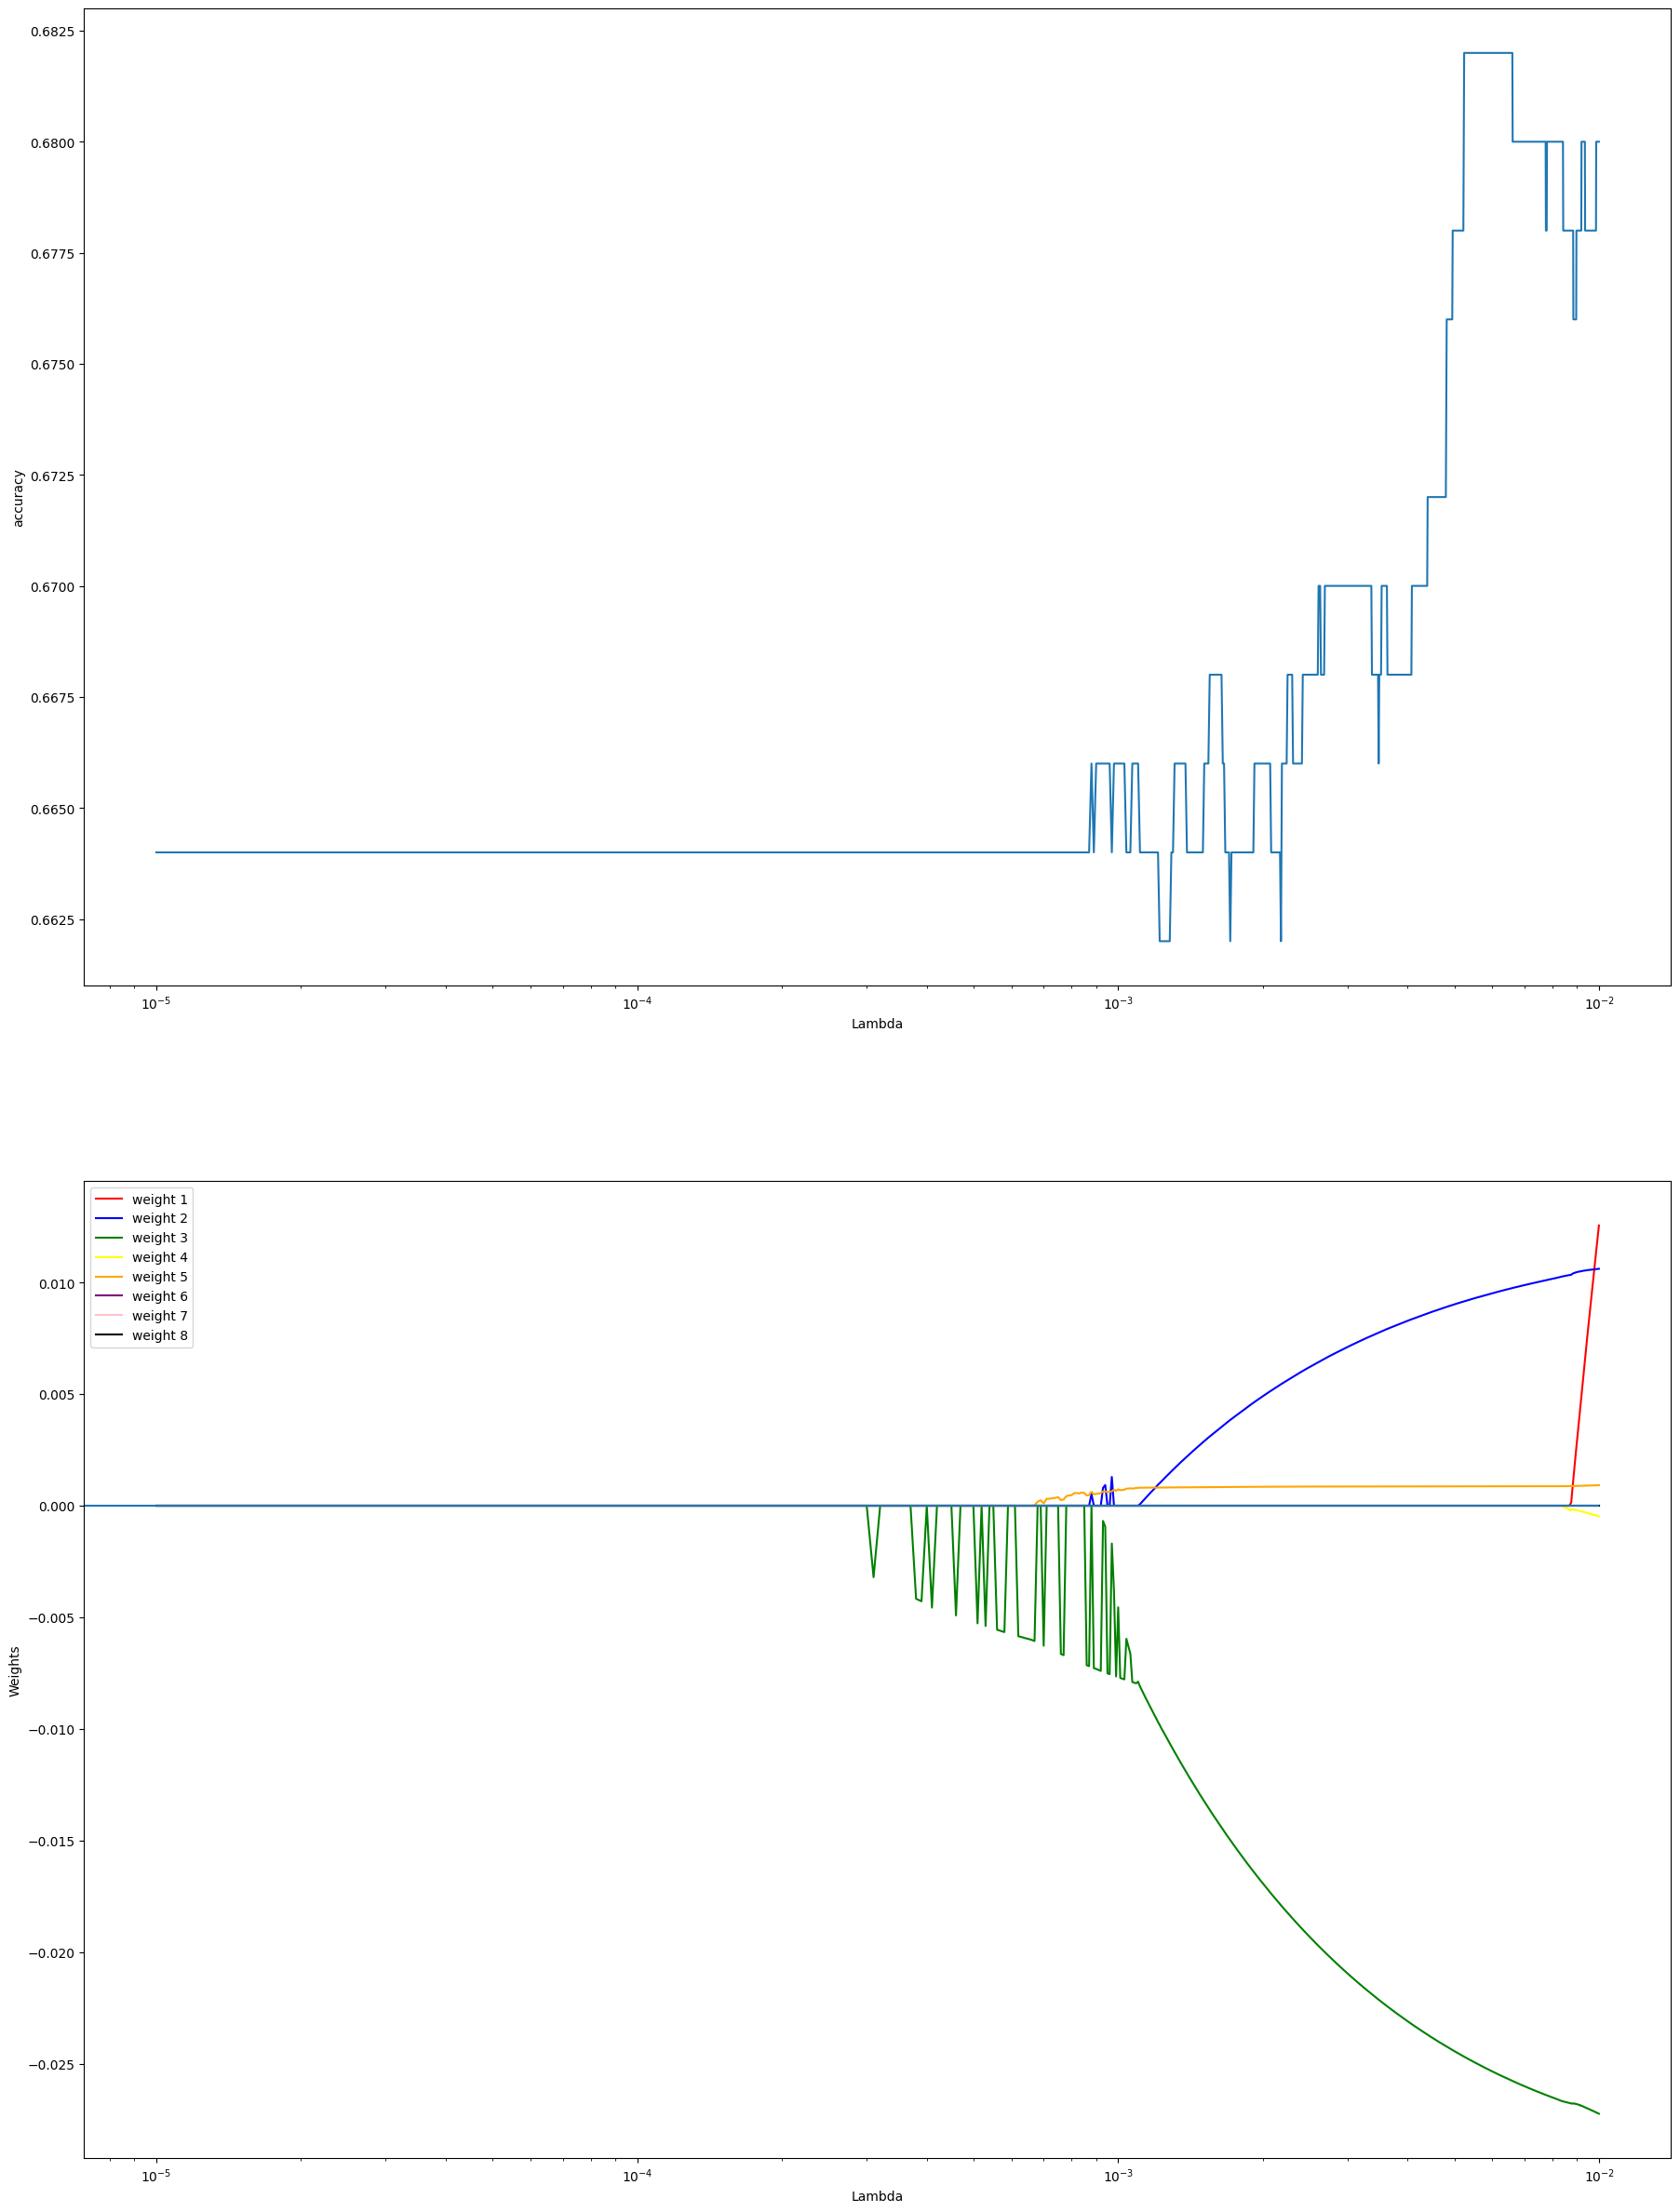

In [157]:
plt.figure(figsize=(19, 9), dpi=120)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 30))

ax1.plot(alphas, acc.ravel())
ax2.plot(alphas, res[:, 0], color='red', label='weight 1')
ax2.plot(alphas, res[:, 1], color='blue', label='weight 2')
ax2.plot(alphas, res[:, 2], color='green', label='weight 3')
ax2.plot(alphas, res[:, 3], color='yellow', label='weight 4')
ax2.plot(alphas, res[:, 4], color='orange', label='weight 5')
ax2.plot(alphas, res[:, 5], color='purple', label='weight 6')
ax2.plot(alphas, res[:, 6], color='pink', label='weight 7')
ax2.plot(alphas, res[:, 7], color='black', label='weight 8')
ax2.legend()

ax1.set(xlabel='Lambda', ylabel='accuracy')
ax2.set(xlabel='Lambda', ylabel='Weights')
ax2.set_xscale('log')
ax1.set_xscale('log')
ax2.hlines(y=0, xmin=0, xmax=10e-3)

In [158]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
test_size = 268/X.shape[0]
X_train, X_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [159]:
LDA.score(X_train, y_train)

0.772

In [160]:
LDA.score(X_test, y_test)

0.7761194029850746

<Figure size 2500x2500 with 0 Axes>

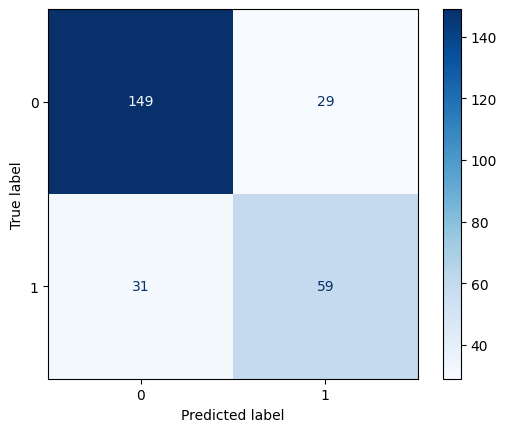

In [161]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
    LDA,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

plt.show()

In [162]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
test_size = 268/X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [163]:
QDA.score(X_train, y_train)

0.786

In [164]:
QDA.score(X_test, y_test)

0.7201492537313433

<Figure size 2500x2500 with 0 Axes>

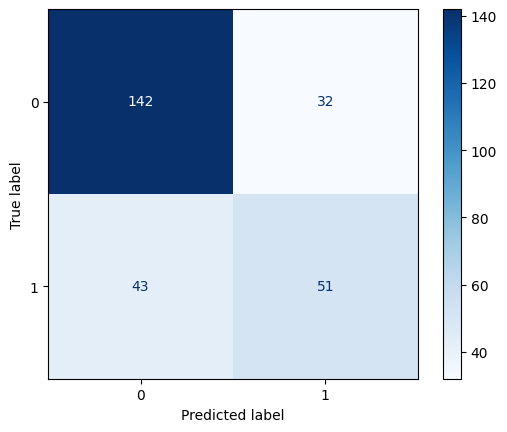

In [165]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
    QDA,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

plt.show()

In [166]:
from sklearn import svm 
SVM = svm.SVC(kernel='linear')
test_size = 268/X.shape[0]
X_train, X_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [167]:
SVM.score(X_train, y_train)

0.774

In [168]:
SVM.score(X_test, y_test)

0.7798507462686567

<Figure size 2500x2500 with 0 Axes>

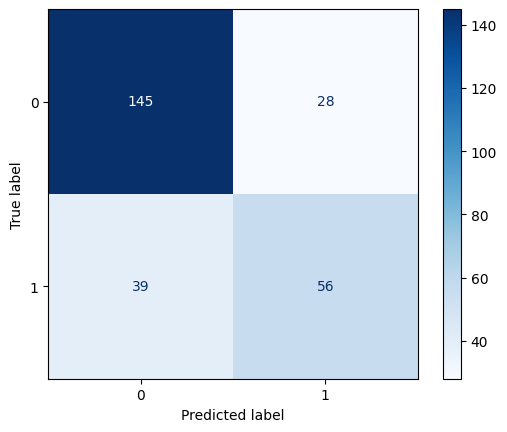

In [169]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
    QDA,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

plt.show()

In [170]:
from sklearn.naive_bayes import GaussianNB
test_size = 268/X.shape[0]
X_train, X_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)
GNB=GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [171]:
GNB.score(X_train, y_train)

0.776

In [172]:
GNB.score(X_test, y_test)

0.7425373134328358

<Figure size 2500x2500 with 0 Axes>

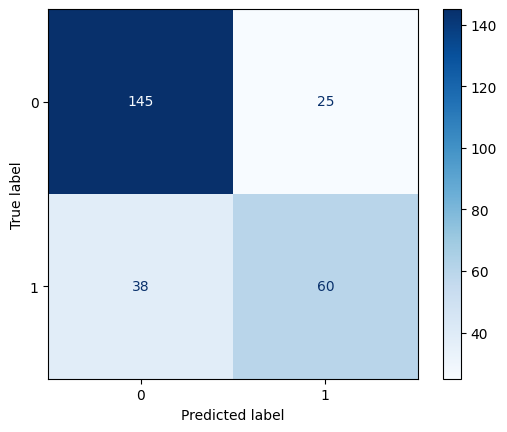

In [173]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
    QDA, 
    X_test, 
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

plt.show()

In [174]:
from sklearn import tree
test_size = 268/X.shape[0]
X_train, X_test, y_train, y_test = train_test_split(X, YR, test_size=test_size)
DecisionTree = tree.DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [175]:
DecisionTree.score(X_train, y_train)

1.0

In [176]:
DecisionTree.score(X_test, y_test)

0.7014925373134329

<Figure size 2500x2500 with 0 Axes>

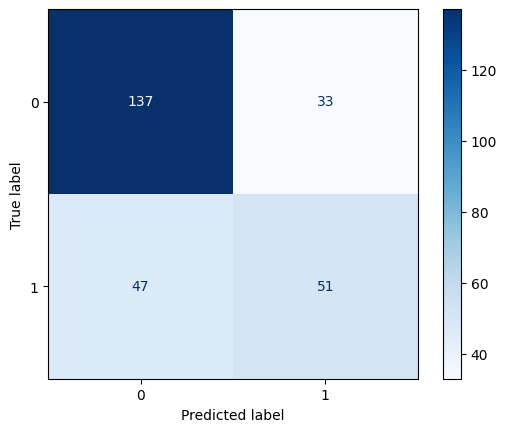

In [177]:
plt.figure(figsize=(25,25))
disp = ConfusionMatrixDisplay.from_estimator(
    DecisionTree,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

plt.show()

In [178]:
fig = plt.figure(figsize=(100,100))
_= tree.plot_tree(DecisionTree, feature_names=Xdf.columns, filled=True)

In [179]:
clf2 = tree.DecisionTreeClassifier(min_samples_leaf=10)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [180]:
clf2.score(X_train, y_train)

0.838

In [181]:
clf2.score(X_test, y_test)

0.7014925373134329

In [182]:
clf3 = tree.DecisionTreeClassifier(min_samples_leaf=40)
clf3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=40)

In [183]:
clf3.score(X_train, y_train)

0.802

In [184]:
clf3.score(X_test, y_test)

0.75

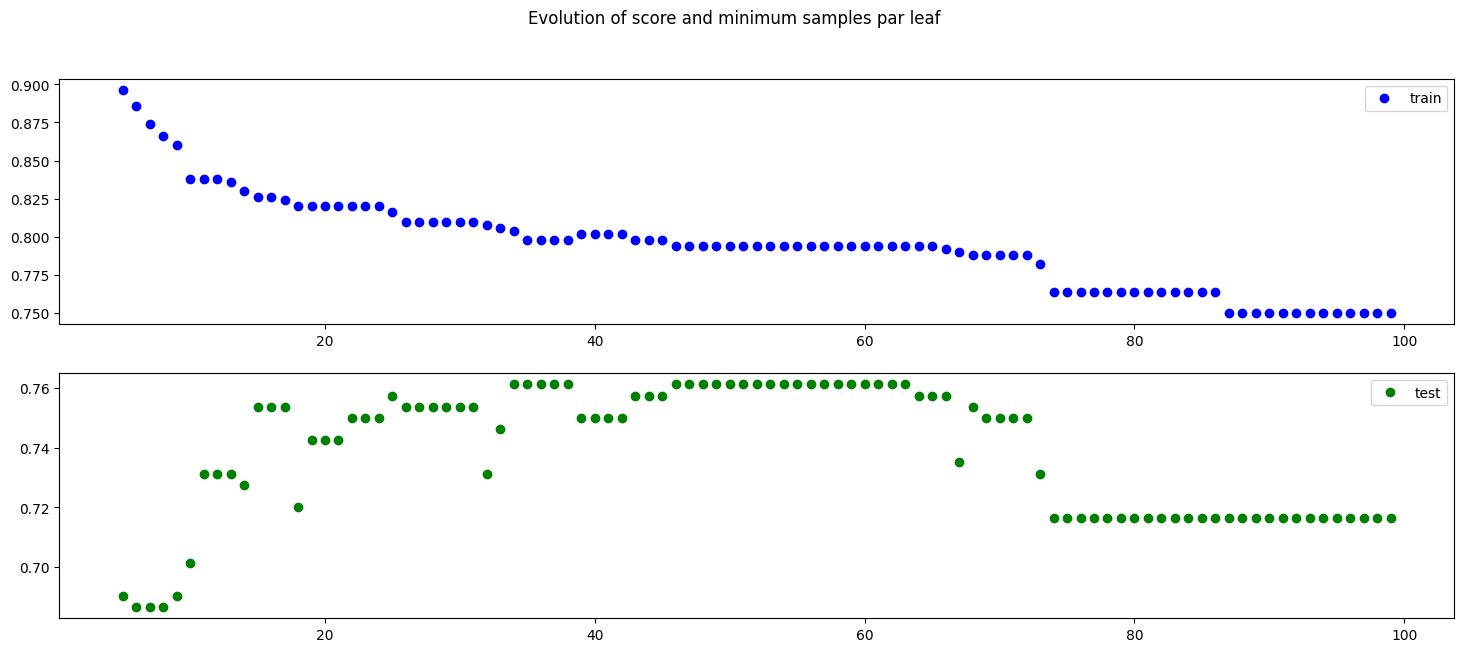

In [185]:
min_ = 5 
max_ = 100
range_ = max_ - min_
scores_train = np.zeros((range_))
scores_test = np.zeros((range_))
t = np.arange(min_,max_,step=1)

for i, val in enumerate(t):
    clf = tree.DecisionTreeClassifier(min_samples_leaf=val)
    clf.fit(X_train, y_train)
    #print("score Train : ", clf.score(X_train, y_train))
    #print("score Test : ,clf.score(X_test, y_test))
    scores_train[i] = clf.score(X_train, y_train)
    scores_test[i] = clf.score(X_test, y_test) 

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(18, 7)
fig.suptitle('Evolution of score and minimum samples par leaf')
ax1.plot(t, scores_train, 'bo', label='train')
ax2.plot(t, scores_test, 'go', label='test')
ax1.legend()
ax2.legend()
plt.show()
             

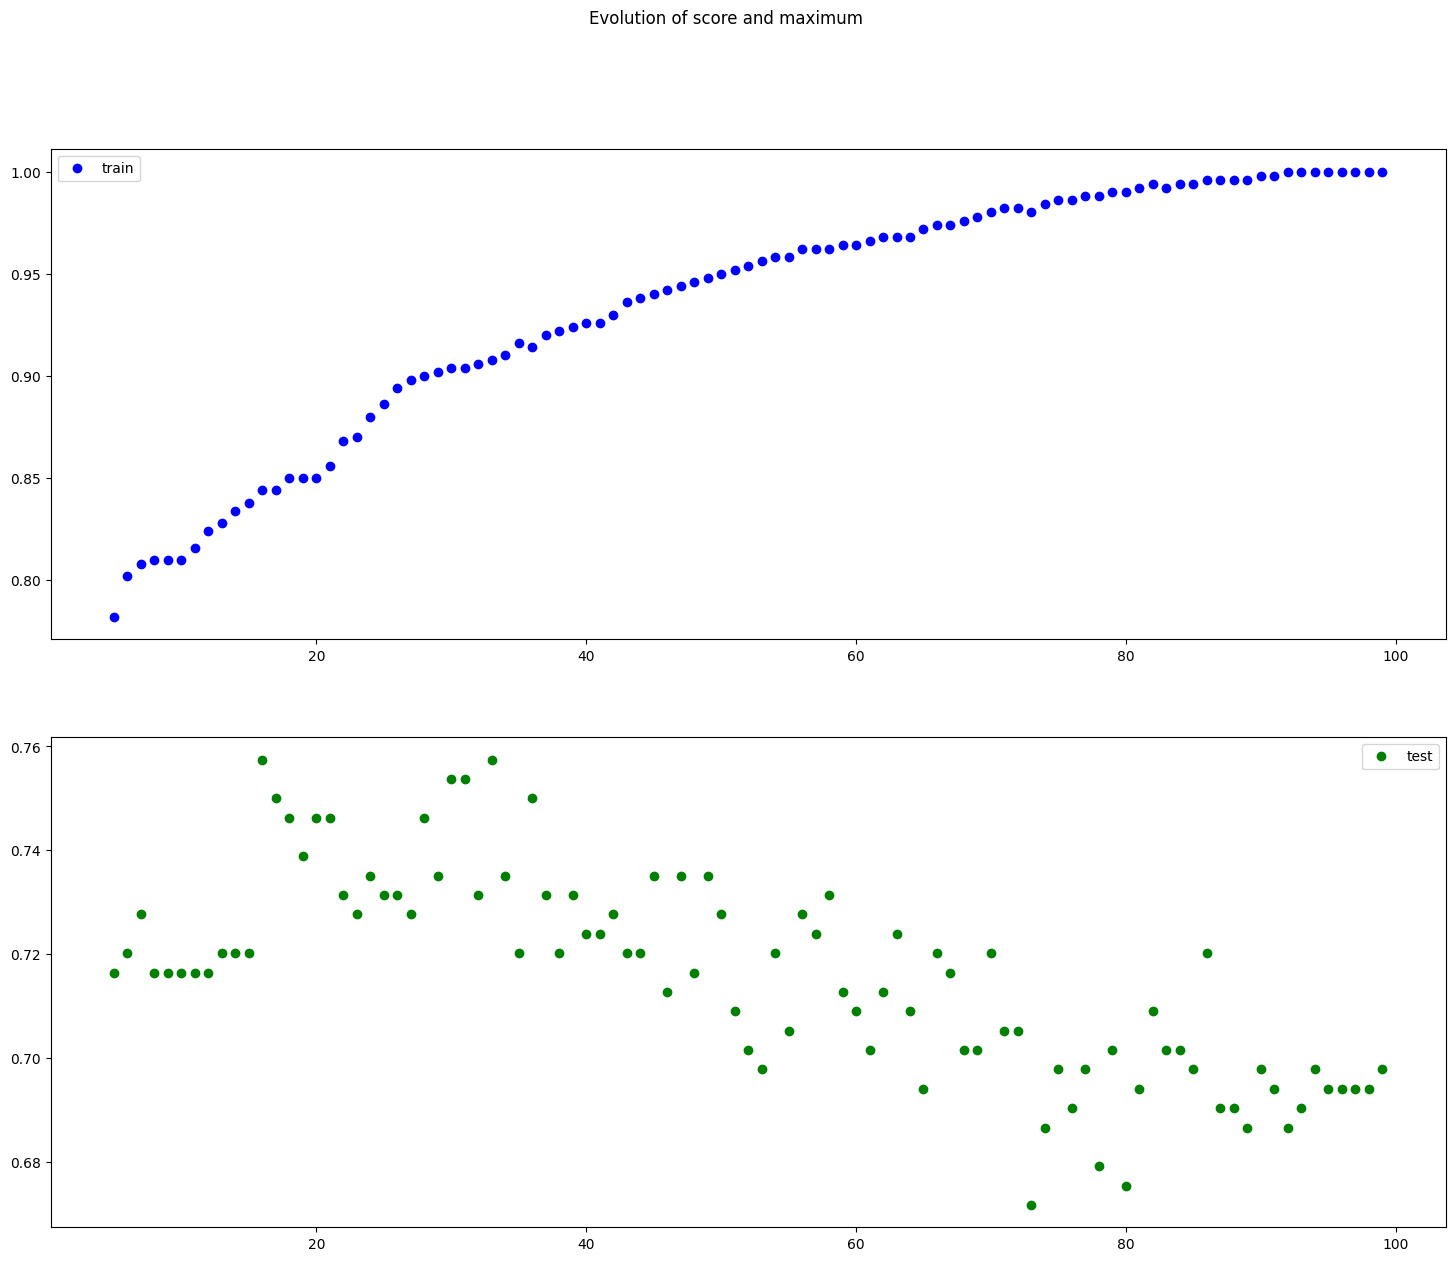

In [186]:
min_ = 5
max_ = 100
range_ = max_ - min_
scores_train = np.zeros((range_))
scores_test = np.zeros((range_))
t = np.arange(min_, max_, step=1)

for i, val in enumerate(t):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=val)
    clf.fit(X_train, y_train)
    #print("score Train : ",clf.score(X_train, y_train))
    #print("score Test : ", clf.score(X_test, y_test))
    scores_train[i] = clf.score(X_train, y_train)
    scores_test[i] = clf.score(X_test, y_test)

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(18,14)
fig.suptitle('Evolution of score and maximum')
ax1.plot(t, scores_train, 'bo', label='train')
ax2.plot(t, scores_test, 'go', label='test')
ax1.legend()
ax2.legend()
plt.show()

In [187]:
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    print(
    "Number of nodes in the last tree is : {} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is : 179 with ccp_alpha: 0.08880224693854627
Number of nodes in the last tree is : 173 with ccp_alpha: 0.08880224693854627
Number of nodes in the last tree is : 173 with ccp_alpha: 0.08880224693854627
Number of nodes in the last tree is : 163 with ccp_alpha: 0.08880224693854627
Number of nodes in the last tree is : 155 with ccp_alpha: 0.08880224693854627
Number of nodes in the last tree is : 151 with ccp_alpha: 0.08880224693854627
Number of nodes in the last tree is : 147 with ccp_alpha: 0.08880224693854627
Number of nodes in the last tree is : 139 with ccp_alpha: 0.08880224693854627
Number of nodes in the last tree is : 135 with ccp_alpha: 0.08880224693854627
Number of nodes in the last tree is : 131 with ccp_alpha: 0.08880224693854627
Number of nodes in the last tree is : 131 with ccp_alpha: 0.08880224693854627
Number of nodes in the last tree is : 119 with ccp_alpha: 0.08880224693854627
Number of nodes in the last tree is : 111 with ccp_alpha: 0.0888

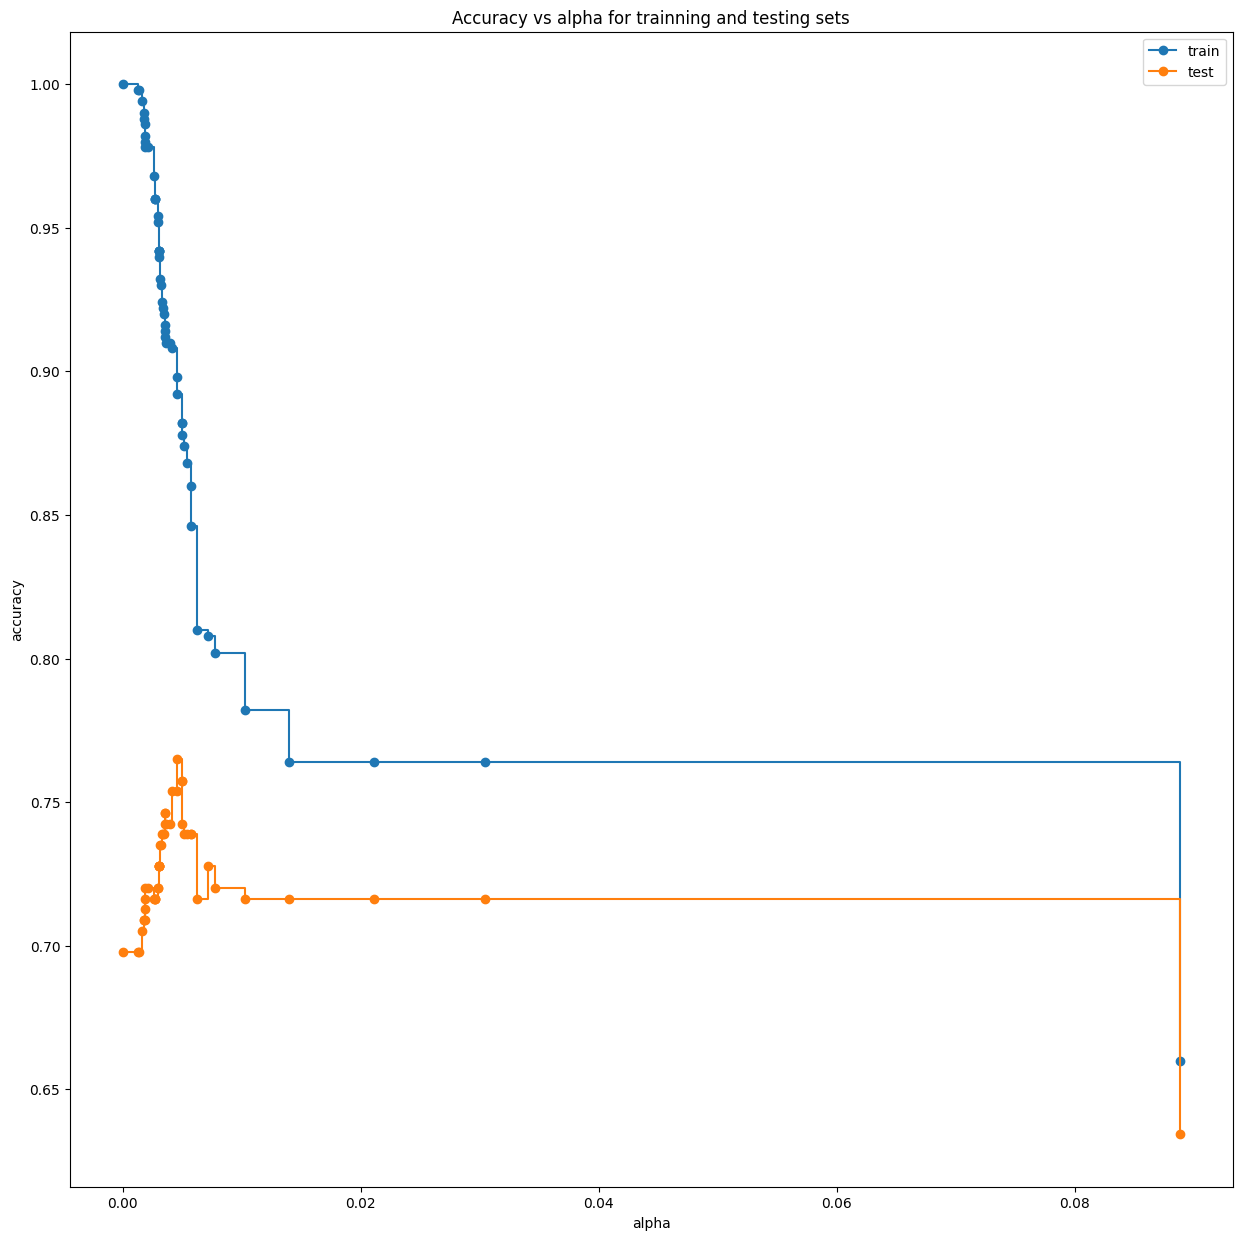

In [188]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(15,15))

ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for trainning and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
#plt.xscale('log')
ax.legend()
plt.show()

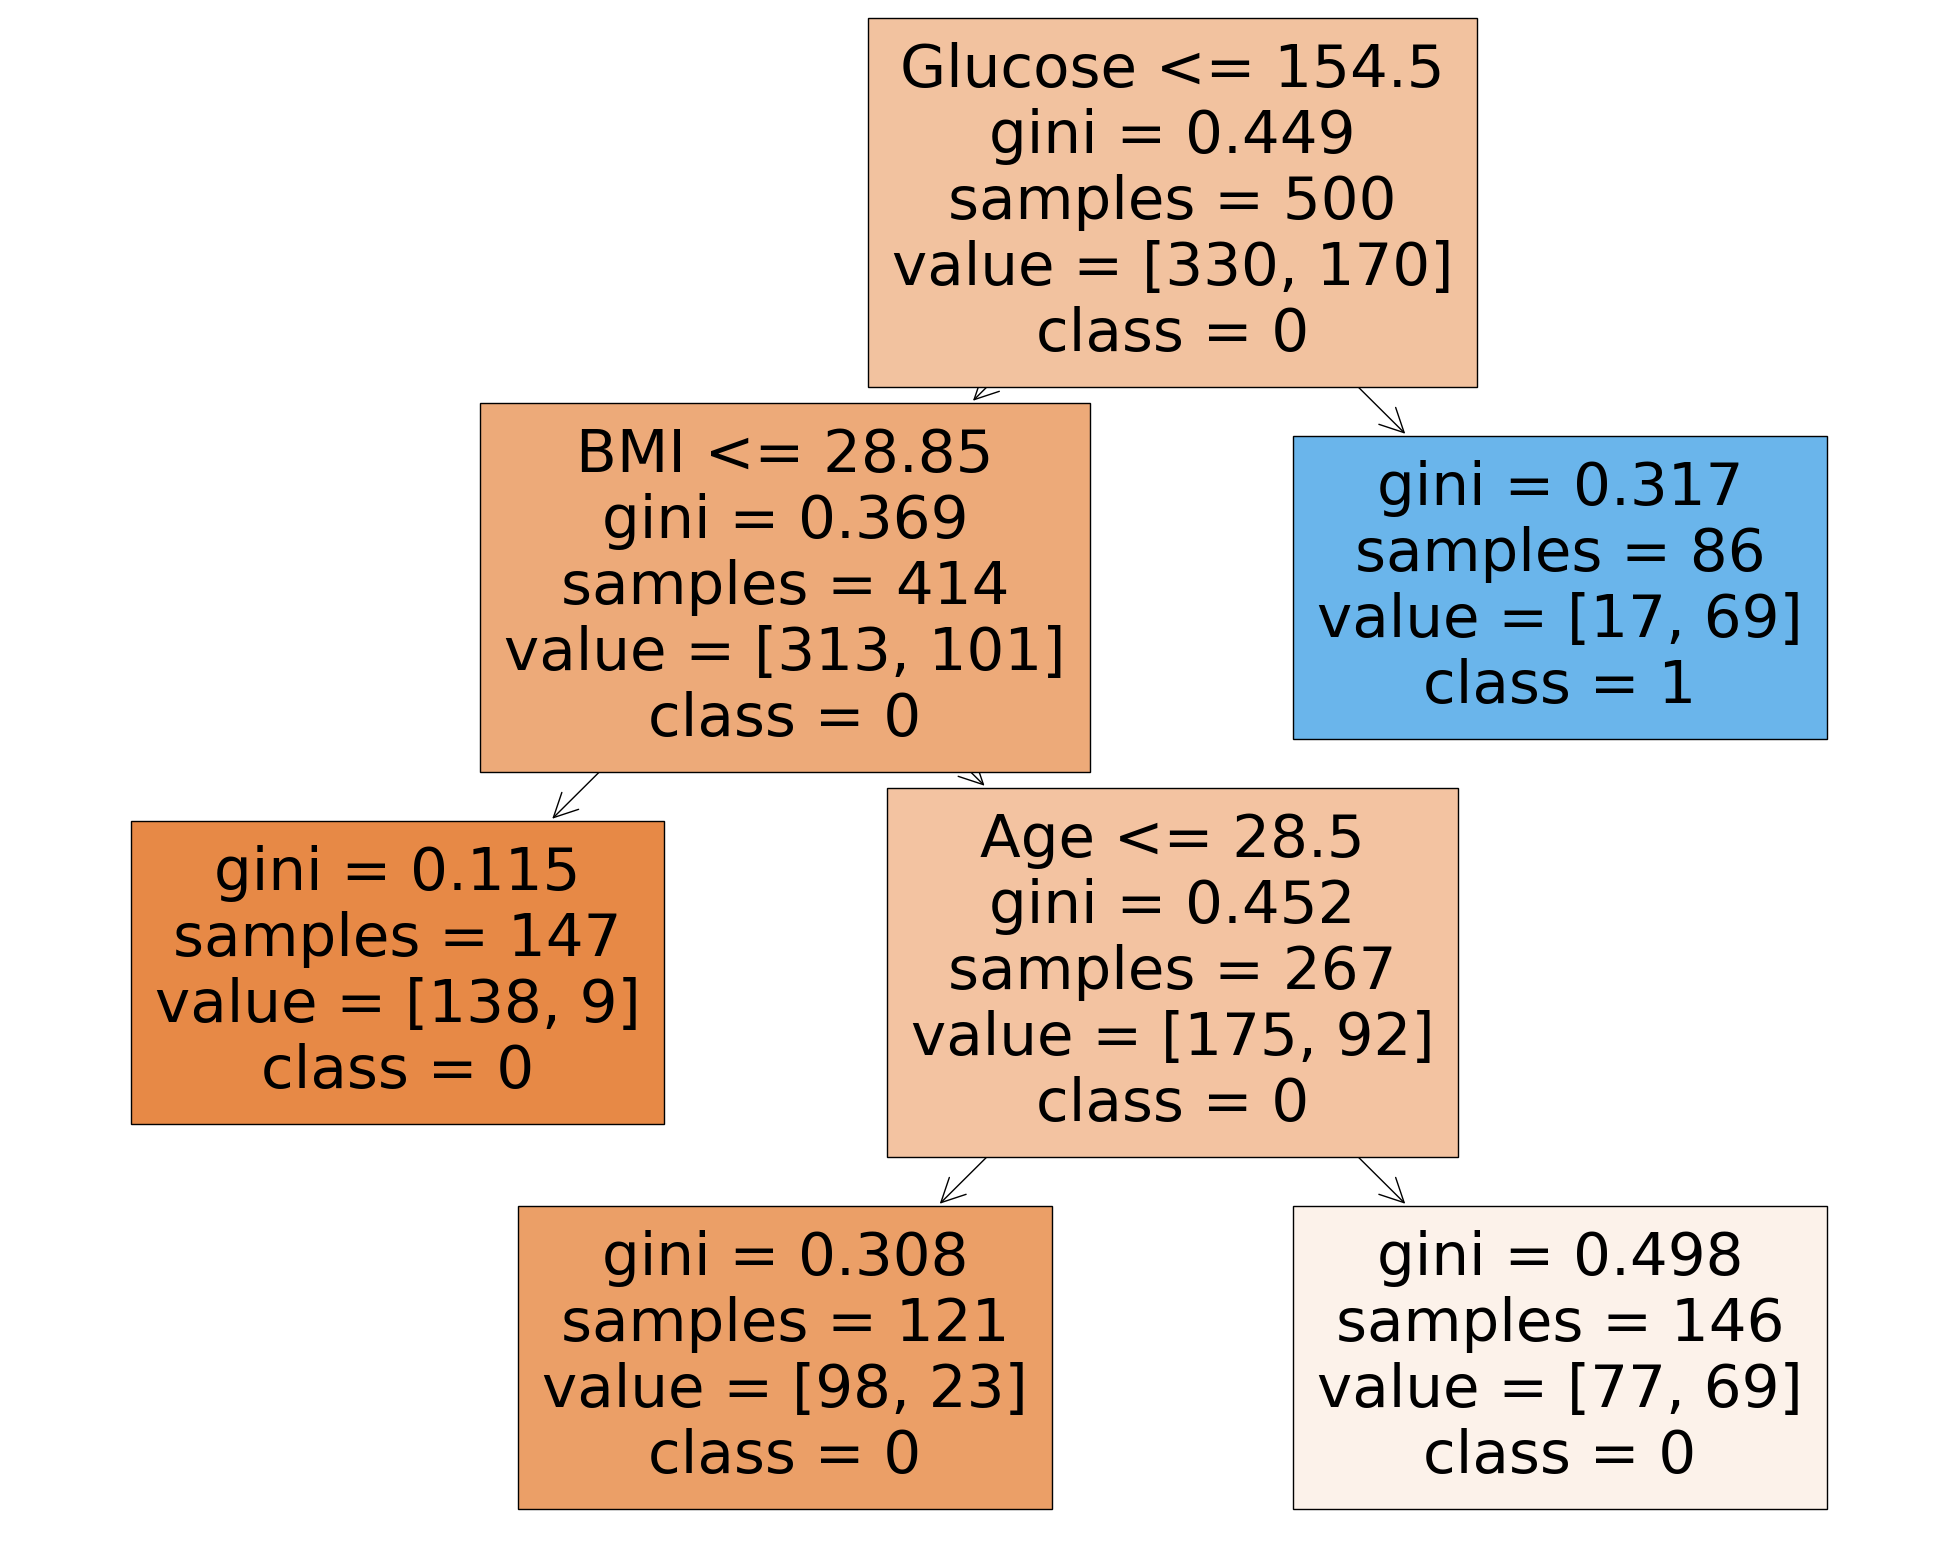

In [189]:
fig = plt.figure(figsize=(25,20))
clf = tree.DecisionTreeClassifier(ccp_alpha=0.02)
clf.fit(X_train, y_train)
_ = tree.plot_tree(clf, feature_names=Xdf.columns, class_names=["0","1"], filled=True)

In [190]:
clf.score(X_train, y_train)

0.764

In [191]:
clf.score(X_test, y_test)

0.7164179104477612

In [192]:
clf = tree.DecisionTreeClassifier(ccp_alpha=0.021, max_leaf_nodes=15)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.021, max_leaf_nodes=15)

In [193]:
clf.score(X_train, y_train)

0.764

In [194]:
clf.score(X_test, y_test)

0.7164179104477612

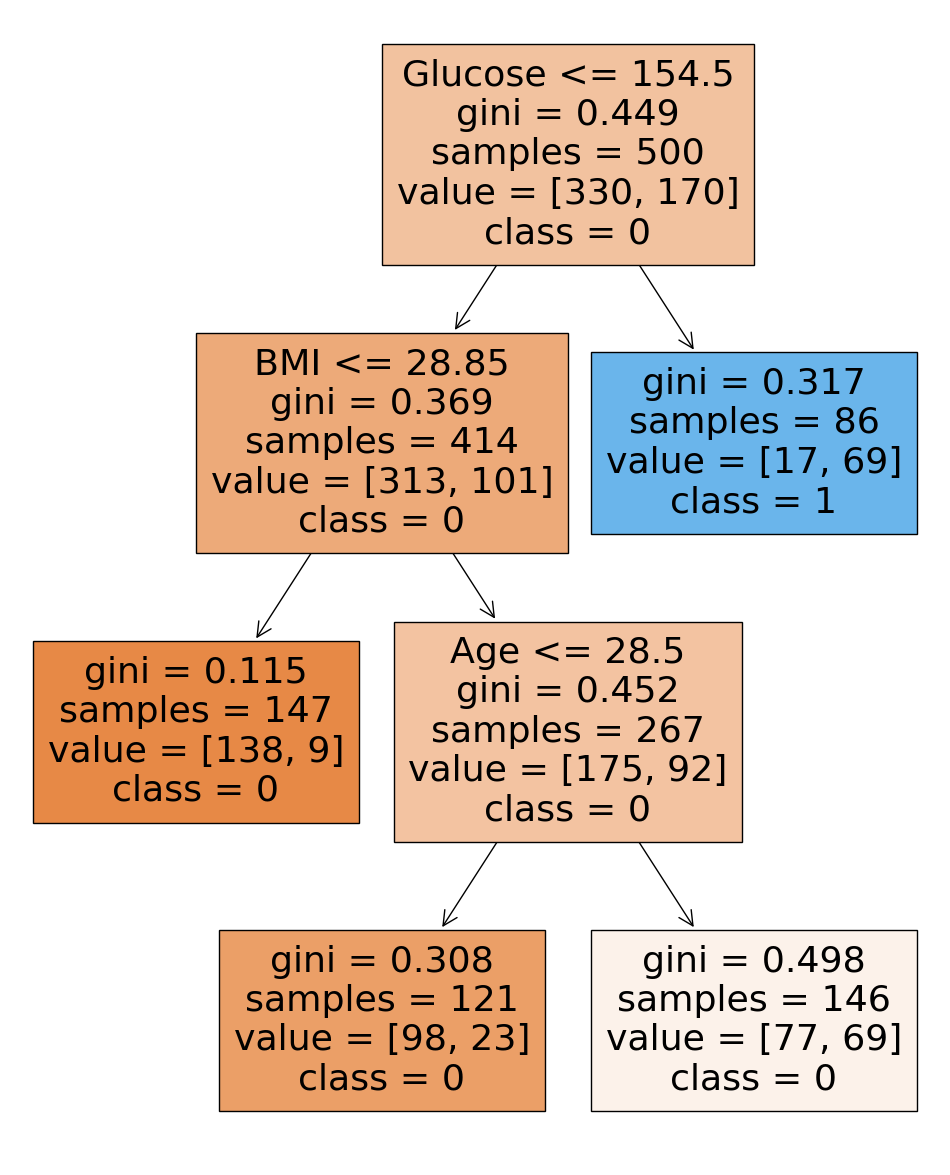

In [195]:
fig = plt.figure(figsize=(12,15))
_ = tree.plot_tree(clf, feature_names=Xdf.columns, class_names=["0","1"], filled=True)

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

In [204]:
#Comparaison de tous les algorithmes
dfs = []

models = [
    ('LogReg', LogisticRegression(max_iter=1000)),
    ('RF', RandomForestClassifier()),
    ('SVM', svm.SVC()),
    ('GNB', GaussianNB()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('LDA', LinearDiscriminantAnalysis()),
]

results = []
names = []
scoring = ['accuracy']
n_splits = 10
target_names = ['np diabetes', 'diabetes']
for name, model in models: 
    kfold = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, X, YR, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)

final = pd.concat(dfs, ignore_index=True)

In [205]:
final

,fit_time,score_time,test_accuracy,model
0,0.057000,0.000995,0.740260,LogReg
1,0.030998,0.001001,0.727273,LogReg
2,0.029001,0.000997,0.818182,LogReg
3,0.024001,0.000000,0.792208,LogReg
4,0.031001,0.001002,0.779221,LogReg
5,0.021994,0.000000,0.818182,LogReg
6,0.021023,0.001000,0.805195,LogReg
7,0.021999,0.000984,0.753247,LogReg
8,0.028998,0.001001,0.684211,LogReg
9,0.029994,0.001002,0.855263,LogReg


<Axes: title={'center': 'test_accuracy'}, xlabel='model'>

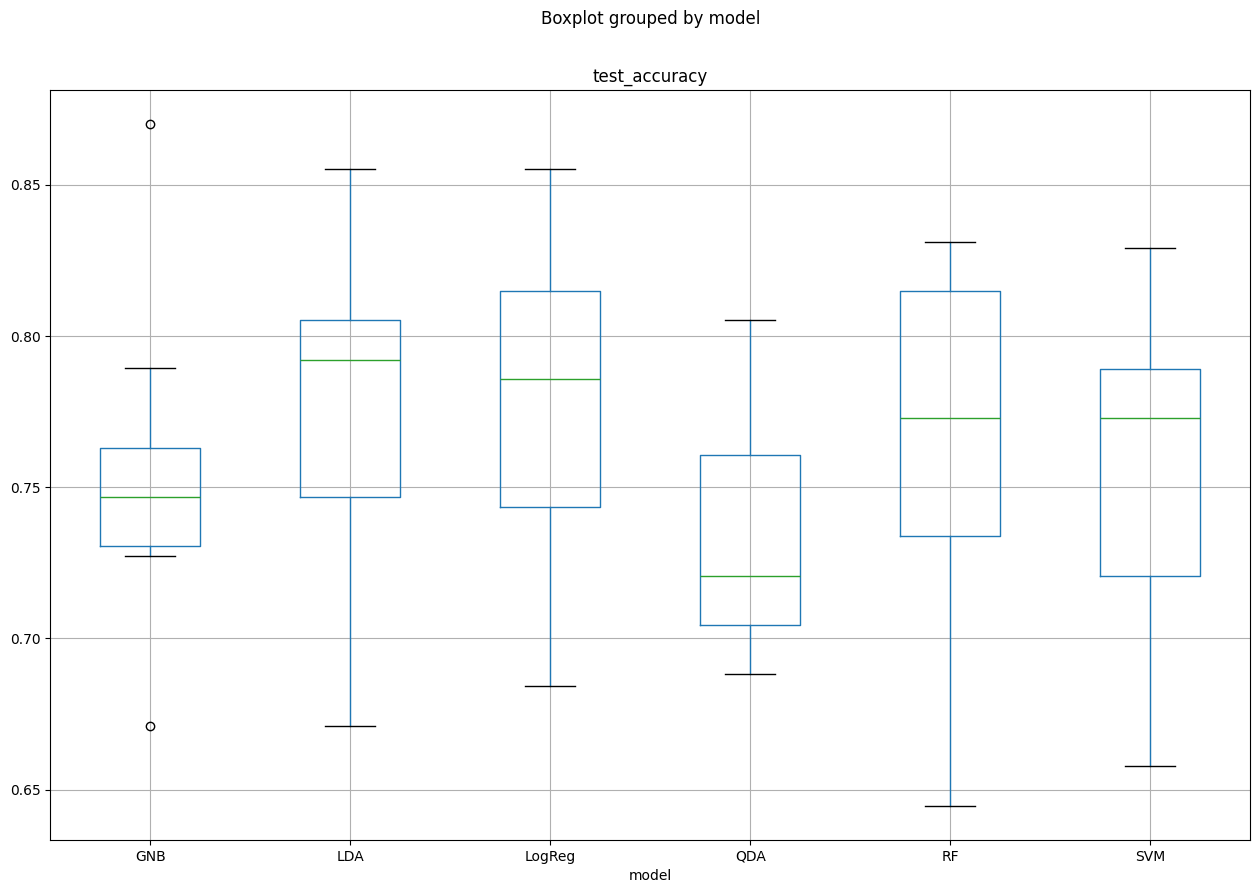

In [206]:
final.boxplot(column='test_accuracy', by='model', figsize=(15,10))

In [207]:
#Partie KMeans
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

For n_clusters  2 The average silhouette_score is : 0.5687897205830247
For n_clusters  3 The average silhouette_score is : 0.5104287492214447
For n_clusters  4 The average silhouette_score is : 0.4265796361751044
For n_clusters  5 The average silhouette_score is : 0.39537874871000217
For n_clusters  6 The average silhouette_score is : 0.33321270205407755


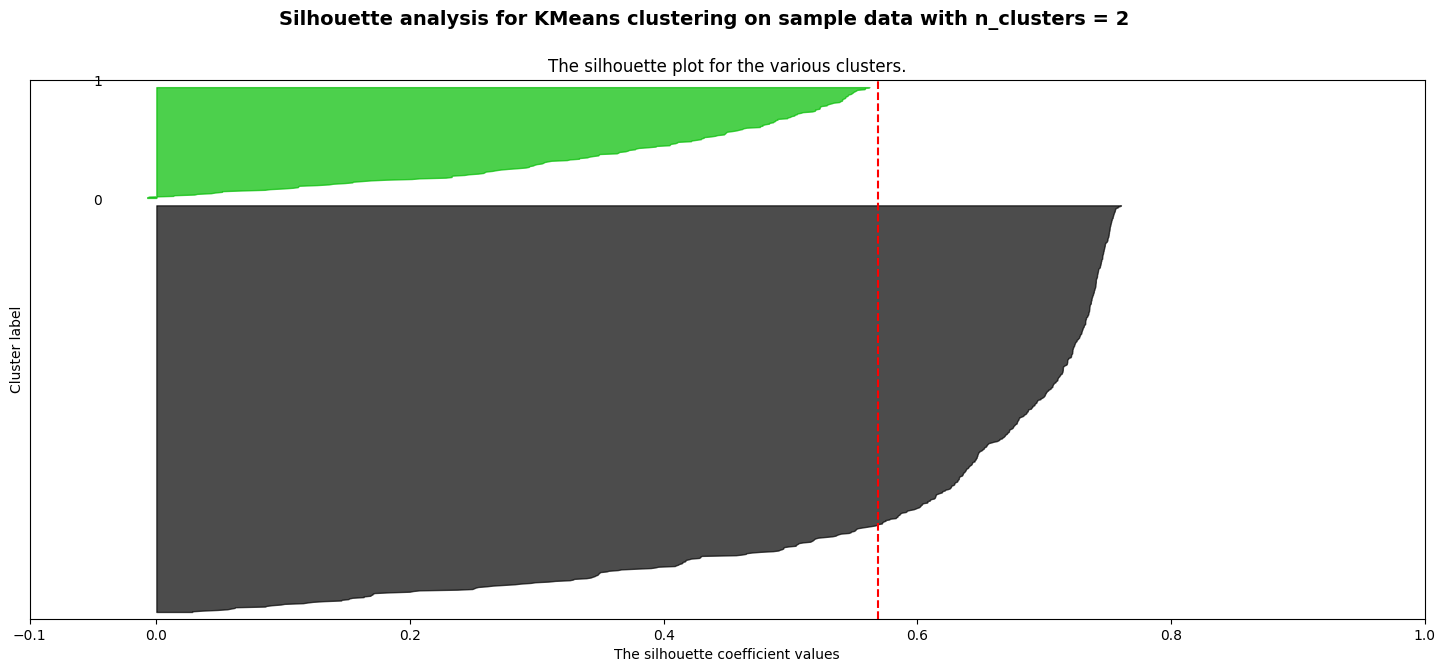

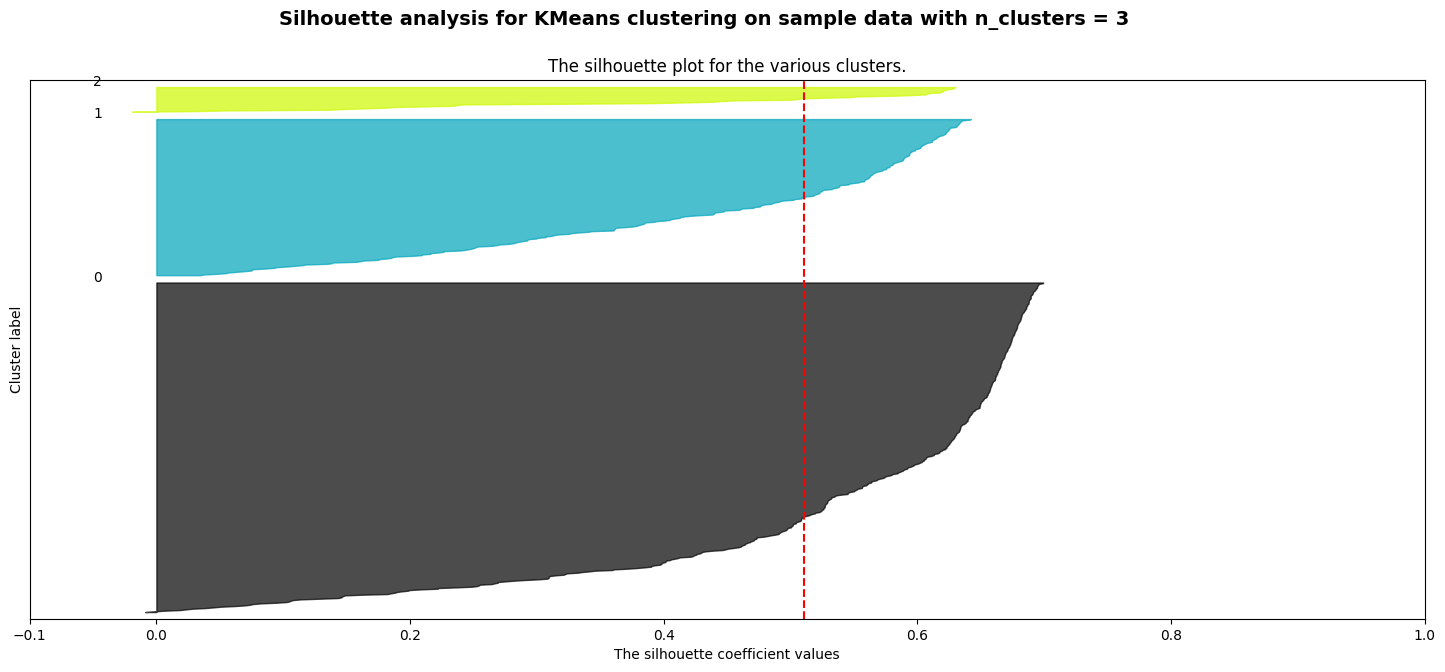

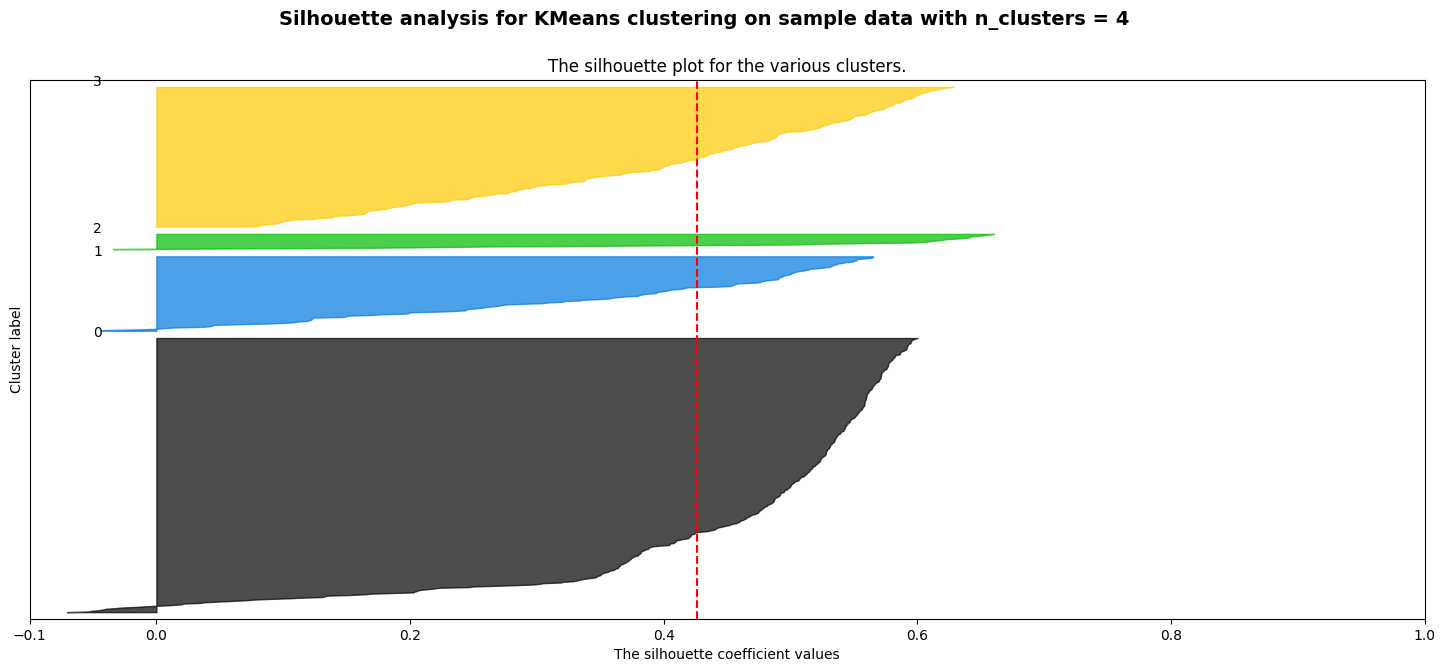

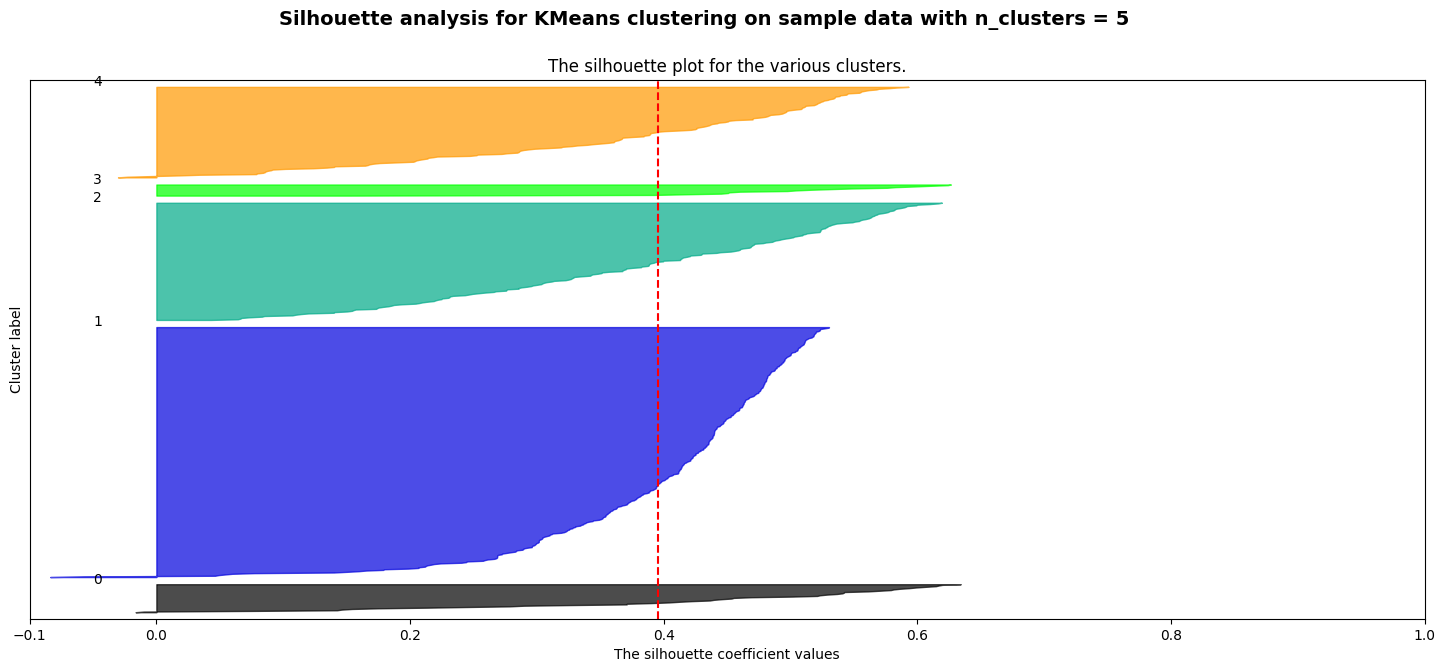

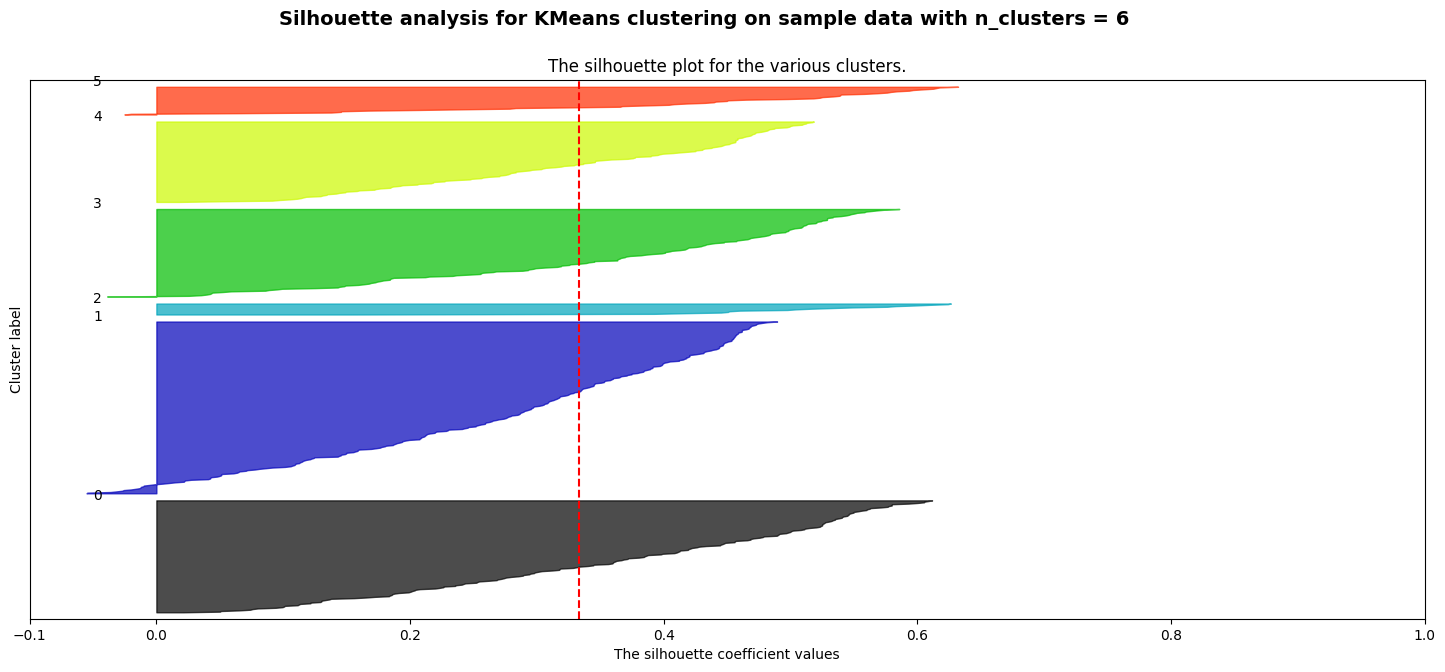

In [216]:
kmeans = KMeans(n_init=10)
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ", 
          n_clusters,
          "The average silhouette_score is :", 
          silhouette_avg,
         )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
       ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
       ith_cluster_silhouette_values.sort()
       size_cluster_i = ith_cluster_silhouette_values.shape[0]
       y_upper = y_lower + size_cluster_i
       color = cm.nipy_spectral(float(i) / n_clusters)
         
       ax1.fill_betweenx(
         np.arange(y_lower, y_upper),
         0,
         ith_cluster_silhouette_values,
         facecolor=color,
         edgecolor=color,
         alpha=0.7,
       )

       ax1.text(-0.05, y_lower+ 0.5 + size_cluster_i, str(i))

       y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
      "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
      % n_clusters,
      fontsize=14,
      fontweight="bold",
    )

In [218]:
kmeans = KMeans(n_clusters=2, n_init=10)
clusters = kmeans.fit_predict(X)

In [219]:
silhouette_avg = silhouette_score(X, clusters)
sample_silhouette_values = silhouette_samples(X, clusters)

In [220]:
print("Clusters : 2, silhouette avg : ", silhouette_avg)

Clusters : 2, silhouette avg :  0.5687897205830247


In [221]:
k_labels = kmeans.labels_
k_labels_matched = np.empty_like(k_labels)

In [222]:
print(k_labels)

[0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 

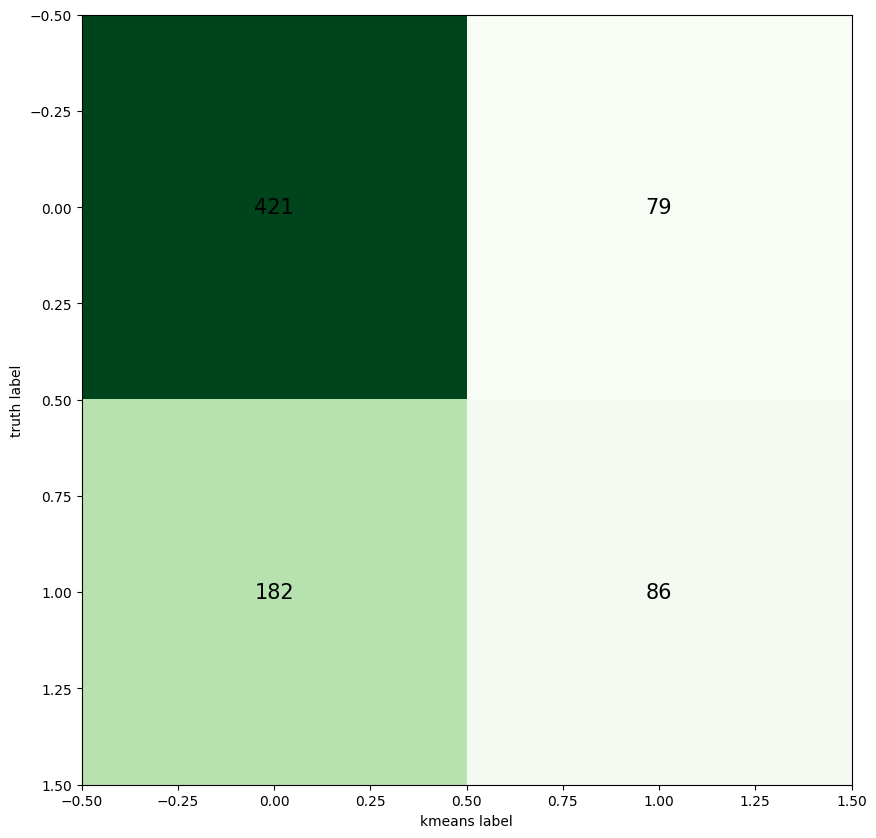

In [228]:
from sklearn.metrics import confusion_matrix
for k in np.unique(k_labels):
    match_nums = [np.sum((k_labels==k)*(YR==t)) for t in np.unique(YR)]
    k_labels_matched[k_labels==k] = np.unique(YR)[np.argmax(match_nums)]
cm = confusion_matrix(YR, k_labels_matched)

plt.figure(figsize=(10,10))
plt.imshow(cm,interpolation='none',cmap='Greens')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize=15)
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show() 